In [5]:
#!cat LUPerson_clip_128w_phrase_arrow.tar.gz.* > LUPerson_full.tar.gz

#这个命令将所有以 `LUPerson_clip_128w_phrase_arrow.tar.gz.` 开头的文件合并成一个名为 `LUPerson_full.tar.gz` 的文件。

In [1]:
!ls

customer_reid_evalution.py  marketDataPrepare.py   run_clip.ipynb
DataPrepare.ipynb	    marketDataTest.py	   run_clip.py
evaluation.ipynb	    marketEvaluate_gpu.py


In [2]:
!tar -zxvf ../data/LUPerson_full.tar.gz -C ../data
#这个命令将解压缩 `.tar.gz` 文件。`-z` 选项告诉 `tar` 命令这是一个 gzip 压缩的文件，`-x` 表示解压缩，`-v` 表示在解压缩时显示详细信息，`-f` 指定文件名。

LUPerson_clip_128w_phrase_arrow/
LUPerson_clip_128w_phrase_arrow/LUPerson_test.arrow
LUPerson_clip_128w_phrase_arrow/LUPerson_train.arrow
LUPerson_clip_128w_phrase_arrow/LUPerson_val.arrow
LUPerson_clip_128w_phrase_arrow/LUPerson_restval.arrow


In [7]:
!pip install pyarrow

In [13]:
import pyarrow as pa

# 读取 Arrow 文件
with open('../data/LUPerson_clip_128w_phrase_arrow/LUPerson_restval.arrow', 'rb') as f:
    reader = pa.ipc.open_file(f)
    table = reader.read_all()

# 将 Arrow Table 转换为 Pandas DataFrame（如果需要）
df = table.to_pandas()

# 现在你可以使用 Pandas DataFrame
print(df.head())
print(len(df))

# 这段代码首先使用 `pyarrow` 读取 `.arrow` 文件，并将其转换为 `Arrow Table`。然后，它使用 `to_pandas()` 方法将 `Arrow Table` 转换为 Pandas 的 `DataFrame`，这样你就可以使用 Pandas 进行进一步的数据分析和处理。

                                               image  \
0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
1  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
2  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
3  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
4  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   

                                             caption                 image_id  \
0  [The male is wearing a red short sleeve and re...  35_15_0119_00000497.jpg   
1  [A man in a yellow shirt, brown pants and a ba...  18_01_0169_00000733.jpg   
2  [The woman has long hairstyle, a brown pure co...  14_00_0205_00000820.jpg   
3  [The kid has safety helmet on short hair, a da...  32_00_0304_00005312.jpg   
4  [A middle-aged woman with long-haired is weari...  15_00_0097_00000830.jpg   

     split  
0  restval  
1  restval  
2  restval  
3  restval  
4  restval  
475


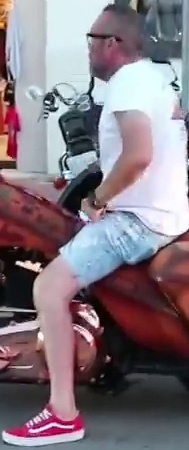

Image ID: 35_15_0119_00000497.jpg
Caption: ['The male is wearing a red short sleeve and red trunks. He is carrying a safety helmet. He is sitting on the road.']


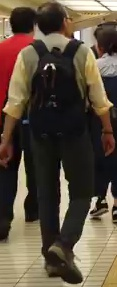

Image ID: 18_01_0169_00000733.jpg
Caption: ['A man in a yellow shirt, brown pants and a bag is taking a walk.'
 'A man in his middle-aged having long hair is wearing a yellow stripe blouse over khaki pants. He also has a bag.']


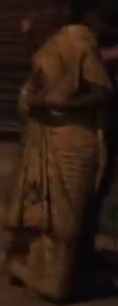

Image ID: 14_00_0205_00000820.jpg
Caption: ['The woman has long hairstyle, a brown pure color dress and brown long skirt carrying a bag. She is a middle-aged woman standing.'
 'The <gender>"s hair is long hair. She has a brown dress. Her skirt is khaki. She is carrying a bag in her hand.']


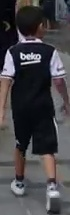

Image ID: 32_00_0304_00005312.jpg
Caption: ['The kid has safety helmet on short hair, a dark stripe short sleeve and black shorts. She is carrying bag. She is a young kid walking.']


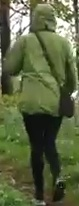

Image ID: 15_00_0097_00000830.jpg
Caption: ['A middle-aged woman with long-haired is wearing a green coloured coat with green long trousers. She is wearing a bag.']


In [14]:
import pandas as pd
from PIL import Image
import io

# 假设df是包含上述数据的DataFrame
# df = ...

# 遍历DataFrame中的每一行
for index, row in df.iterrows():
    # 获取图像二进制数据
    image_data = row['image']
    # 获取图像描述
    caption = row['caption']
    # 获取图像ID
    image_id = row['image_id']

    # 将二进制数据转换为图像
    image = Image.open(io.BytesIO(image_data))
    if index < 5:
        # 显示图像（如果需要）
        image.show()

        # 打印图像的描述和ID
        print(f"Image ID: {image_id}")
        print(f"Caption: {caption}")


        # 如果想要保存图像到磁盘
        #image.save(f"{image_id}.jpg")

### market1501

In [18]:
!python marketDataPrepare.py